In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

#display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

#suppress annoying and harmless warnings
warnings.filterwarnings(
    action = 'ignore',
    module = 'scipy',
    message = '^internal gelsd'
)

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared: 
 0.897210638179


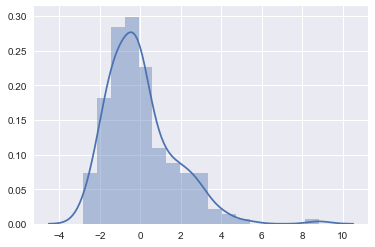

In [2]:
data = pd.read_csv(
    'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',
    index_col=0
)

display(data.head())

#instantiating and fitting the model
regr = linear_model.LinearRegression()
data['Sales_sqrt'] = data.apply(lambda x: x['Sales']**1.5, axis = 1)
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio']]
regr.fit(X,Y)

y_pred = regr.predict(X) 
errors = y_pred - Y 
sns.distplot(errors)

#Looking at the results
print('\nCoefficients: \n', regr.coef_) #so this is saying the coef for TV is 0.04? and that the newspaper
                                        #actually has a negative impact?
    
print('\nIntercept: \n', regr.intercept_)

print('\nR-squared: \n', regr.score(X,Y))


Coefficients: 
 [[ 0.25544868  1.13607778]]

Intercept: 
 [-8.77698854]

R-squared: 
 0.886135930334


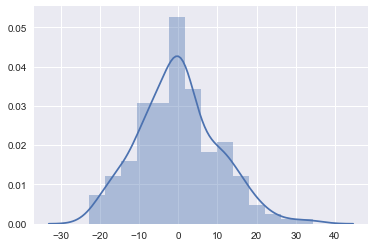

In [10]:
#instantiating and fitting the model
regr = linear_model.LinearRegression()
data['Sales_sqrt'] = data.apply(lambda x: x['Sales']**1.5, axis = 1)
Y = data['Sales_sqrt'].values.reshape(-1,1)
X = data[['TV', 'Radio']]
regr.fit(X,Y)

y_pred = regr.predict(X) 
errors = y_pred - Y 
sns.distplot(errors)

#Looking at the results
print('\nCoefficients: \n', regr.coef_) #so this is saying the coef for TV is 0.04? and that the newspaper
                                        #actually has a negative impact?
    
print('\nIntercept: \n', regr.intercept_)

print('\nR-squared: \n', regr.score(X,Y))

## Working on the TV variable

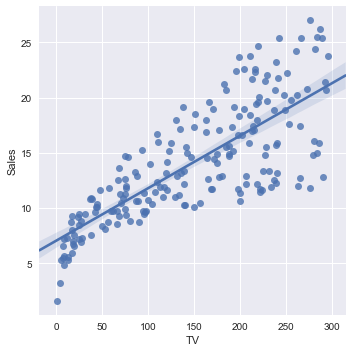

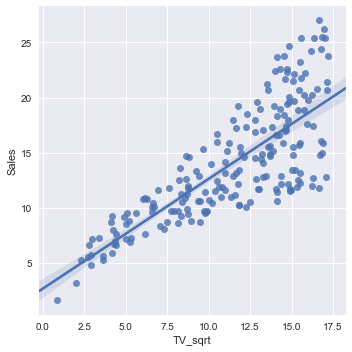

In [4]:
sns.lmplot(x = 'TV', y = 'Sales', data = data)
plt.show()

data['TV_sqrt'] = data.apply(lambda x: math.sqrt(x['TV']), axis = 1)

sns.lmplot(x = 'TV_sqrt', y = 'Sales', data = data)
plt.show()

#sns.lmplot(x = 'Sales', y = 'TV_sqrt', data = data)
#plt.show() # square root doesn't seem to make it more linear, just a bit more condensed

It is still not a great fit but it's better

## Radio transformation

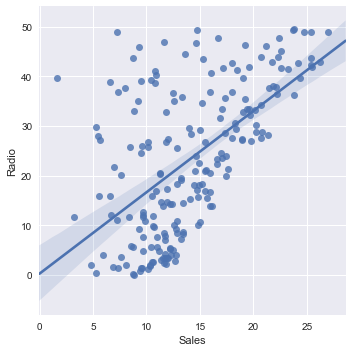

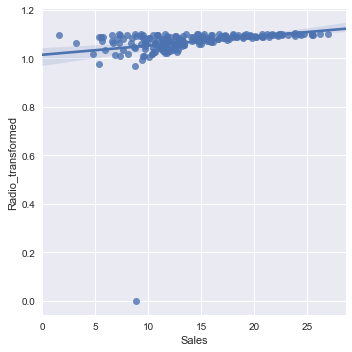

In [5]:
sns.lmplot(x = 'Sales', y = 'Radio', data = data)
plt.show()

data['Radio_transformed'] = data.apply(lambda x: x['Radio']**.025, axis = 1)

sns.lmplot(x = 'Sales', y = 'Radio_transformed', data = data)
plt.show()

There is still one big outlier towardt he bottom there at 0 but I almost wonder if that is bad data since it is the only 0(and was throwing off my attempt at a .log transformation)

## The Newspaper Feature

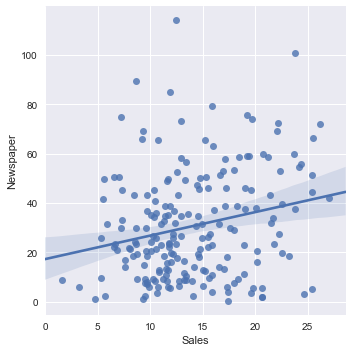

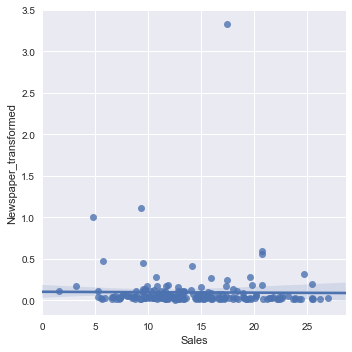

In [6]:
sns.lmplot(x = 'Sales', y = 'Newspaper', data = data)
plt.show()

data['Newspaper_transformed'] = data.apply(lambda x: x['Newspaper']**-1, axis = 1)

sns.lmplot(x = 'Sales', y = 'Newspaper_transformed', data = data)
plt.show()

In [7]:
data.head()

,TV,Radio,Newspaper,Sales,Sales_sqrt,TV_sqrt,Radio_transformed,Newspaper_transformed
1,230.100,37.800,69.200,22.100,103.894,15.169,1.095,0.014
2,44.500,39.300,45.100,10.400,33.539,6.671,1.096,0.022
3,17.200,45.900,69.300,9.300,28.361,4.147,1.100,0.014
4,151.500,41.300,58.500,18.500,79.572,12.309,1.097,0.017
5,180.800,10.800,58.400,12.900,46.332,13.446,1.061,0.017


In [8]:
#instantiating and fitting the model
regr2 = linear_model.LinearRegression()
y = data['Sales'].values.reshape(-1,1)
x = data[['TV_sqrt', 'Radio_transformed', 'Newspaper_transformed']]
regr2.fit(x,y)

#Looking at the results
print('\nCoefficients: \n', regr2.coef_) #so this is saying the coef for TV is 0.04? and that the newspaper
                                        #actually has a negative impact?
    
print('\nIntercept: \n', regr2.intercept_)

print('\nR-squared: \n', regr2.score(x,y))


Coefficients: 
 [[  0.9818854   12.79157152  -0.54413821]]

Intercept: 
 [-10.7763654]

R-squared: 
 0.66270206962


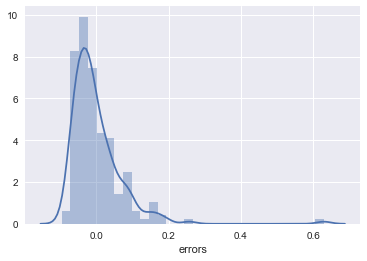

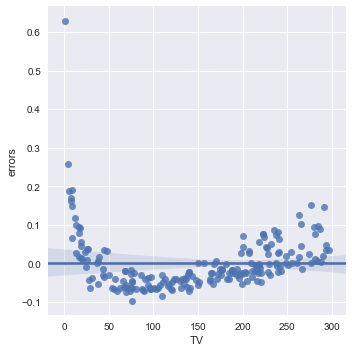

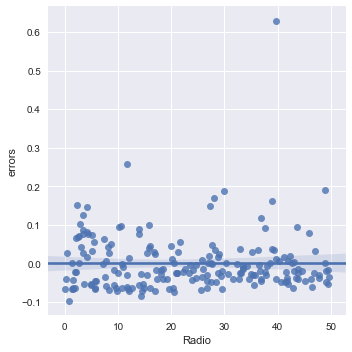

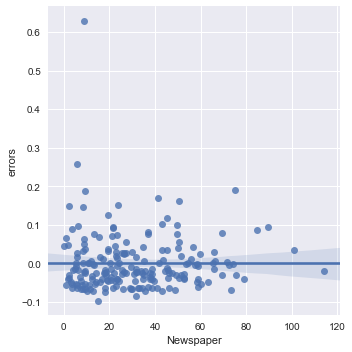

In [9]:
regr = linear_model.LinearRegression()
data['Sales_sqrt'] = data.apply(lambda x: x['Sales']**0.25, axis = 1)
Y = data['Sales_sqrt'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X,Y)
y_pred = regr.predict(X)
data['errors'] = y_pred - Y
sns.distplot(data['errors'])

sns.lmplot(x = 'TV', y = 'errors', data = data)
sns.lmplot(x = 'Radio', y = 'errors', data = data)
sns.lmplot(x = 'Newspaper', y = 'errors', data = data)

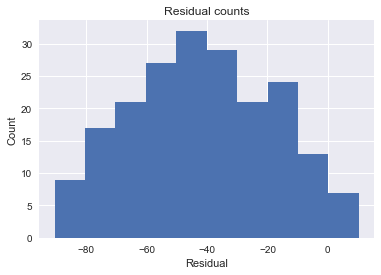

In [12]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

By removing the n